# Project 6c - Implicit time integration
Recall the matrix form of the equations
$$
\frac{\partial \mathbf{u}}{\partial t} = A \mathbf{u} + \mathbf{b}.
$$
Note that these have been discretized in space, but not in time.  The standard forward Euler method for time integration would read:

$$
\frac{\mathbf{u}_{t+1} - \mathbf{u}_t}{\Delta t} = A \mathbf{u}_{t} + \mathbf{b}.
$$
This works, but requires satisfaction of the CFL condition (a maximum time step).  However, it would also be reasonable to write
$$
\frac{\mathbf{u}_{t+1} - \mathbf{u}_t}{\Delta t} = A \mathbf{u}_{t+1} + \mathbf{b},
$$
in which we solve for the future *in terms of the future*: this is called the Backward Euler method.  This turns out to be a little bit more challenging to solve, but a whole lot more stable.  To see why it's harder to solve, let's rearrange the equation $u_{t+1}$:
$$
\left(\frac{I}\Delta t - A\right)\mathbf{u_{t+1}} = \frac{\mathbf{u}_t}{\Delta t} + \mathbf{b}, 
$$
where I is an appropriately sized identity matrix.  Previously, we were able to compute the new $\mathbf{u}_{t+1}$ directly, but now it's being multiplied by a matrix.  In particular, we could write
$$
L \mathbf{u}_{t+1} = \mathbf{f},
$$
where $L = \left(\frac{I}{\Delta t} - A\right)$ and $\mathbf{f}=\frac{\mathbf{u}_t}{\Delta t} + \mathbf{b}$.  Solving this system of linear equations gives us our update.  

**Develop a new integration method class called BackwardEuler.**  This takes a bit of modification to the problem class as well, because the integrator needs more than just the right hand side of the equations to compute the new value of $\mathbf{u}$.  You can assume that BackwardEuler will have access to two new methods of the problem class called stiffness_matrix (which returns $A$) and load_vector (which returns $\mathbf{b}$), both of which you'll also need to implement (although this is sort of trivial).  

In [49]:
import numpy as np
import ode_methods as om
import matplotlib.pyplot as plt

class Diffusion:
    def __init__(self, nx, dx, k=0.01):
        self.nx = nx
        self.dx = dx
        self.k = k
        self.A = self.create_matrix()
    
    def create_matrix(self):
        A = np.zeros((self.nx, self.nx))
        for i in range(1, self.nx - 1): # Interior points
            # here we use k directly, while in the explicit method we used 1, -2, 1 and then multiplied by k in the right hand side
            A[i, i - 1] = self.k
            A[i, i] = -2 * self.k
            A[i, i + 1] = self.k
        A /= self.dx**2 # Normalizing by dx^2
        return A
    
    def stiffness_matrix(self, dt):
        # Stiffness matrix for Backward Euler
        I = np.identity(self.nx)
        return I / dt - self.A
    
    def load_vector(self, u, dt):
        # Load vector for Backward Euler
        return u / dt

In [50]:
class BackwardEuler:
    def __init__(self):
        pass

    def step(self, ode, t, dt, u_0):
        # Compute the matrix L and vector f for the linear system L*u_{t+1} = f
        L = ode.stiffness_matrix(dt)
        f = ode.load_vector(u_0, dt)
        # Solve the linear system
        return np.linalg.solve(L, f)

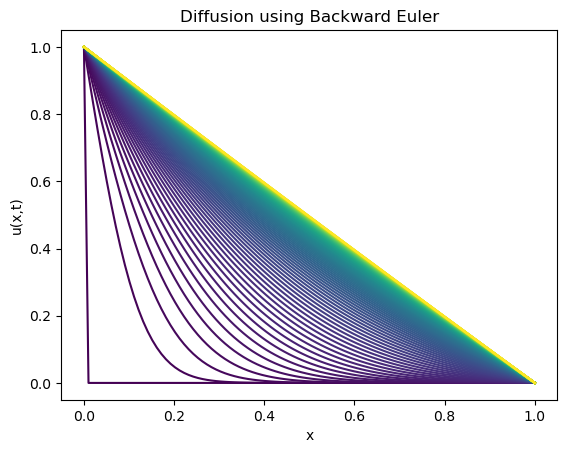

In [51]:
# Setup
L = 1.0  # Length of the domain
nx = 100  # Number of grid points
dx = L / (nx - 1)  # Grid spacing
x = np.linspace(0, L, nx)  # Position array
u0 = np.zeros(nx)  # Initial condition array
u0[0] = 1

# Parameters
k = 0.01 
dt = 0.05  # Time step
t_span = (0, 50)  

# Setup model and solver
ode = Diffusion(nx, dx, k)
method = BackwardEuler()
integrator = om.Integrator(ode, method)
t, u = integrator.integrate(t_span, dt, u0)

# Visualization
cmap = plt.cm.viridis
for tt, uu in zip(t[::10], u[::10]): # Plot every 10th solution
    plt.plot(x, uu, color=cmap(tt/t[-1]))
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title("Diffusion using Backward Euler")
plt.show()

**Test your function by comparing it to solutions using forward Euler for similar (stable) time steps.  Does it perform as well?**  

**Now try it with increasingly large time steps.  Does it suffer the same fate as forward Euler?  What is the relative downside to using this method versus forward Euler?  

**The natural extension of the method described above is to develop a method that computes the steady-state solution, in which the time-derivative is explicitly zero.  Describe and implement a sensible approach.  In particular, consider whether or not the notion of integration through time is even needed anymore.**